In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.model_selection import train_test_split

# Fetch Data:

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/stay-fcsd/data-final-project/main/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Hot Encoding:
Convert categorical features into dummy  columns in the feature table with a binary value for each of the possible categorical values

In [36]:
hot_encoded_df = df.copy()

gender_column = df[["Sex"]]

hot_encoded_df['Male'] = gender_column
hot_encoded_df['Female'] = gender_column

hot_encoded_df = hot_encoded_df.drop('Sex', 1)

chest_pain_type_column = df[["ChestPainType"]]
hot_encoded_df['ATA'] = chest_pain_type_column
hot_encoded_df['TA'] = chest_pain_type_column
hot_encoded_df['ASY'] = chest_pain_type_column
hot_encoded_df['NAP'] = chest_pain_type_column
hot_encoded_df = hot_encoded_df.drop('ChestPainType', 1)

resting_ECG_column = df[["RestingECG"]]
hot_encoded_df['Normal'] = resting_ECG_column
hot_encoded_df['ST'] = resting_ECG_column
hot_encoded_df['LVH'] = resting_ECG_column
hot_encoded_df = hot_encoded_df.drop('RestingECG', 1)

ST_slope_column = df[["ST_Slope"]]

hot_encoded_df['Up'] = ST_slope_column
hot_encoded_df['Flat'] = ST_slope_column
hot_encoded_df['Down'] = ST_slope_column

hot_encoded_df = hot_encoded_df.drop('ST_Slope', 1)

hot_encoded_df['Male'] = hot_encoded_df['Male'].replace(['M'], '1')
hot_encoded_df['Male'] = hot_encoded_df['Male'].replace(['F'], '0')

hot_encoded_df['Female'] = hot_encoded_df['Female'].replace(['M'], '0')
hot_encoded_df['Female'] = hot_encoded_df['Female'].replace(['F'], '1')

hot_encoded_df['ATA'] = hot_encoded_df['ATA'].replace(['ATA'], '1')
hot_encoded_df['ATA'] = hot_encoded_df['ATA'].replace(['TA'], '0')
hot_encoded_df['ATA'] = hot_encoded_df['ATA'].replace(['ASY'], '0')
hot_encoded_df['ATA'] = hot_encoded_df['ATA'].replace(['NAP'], '0')

hot_encoded_df['TA'] = hot_encoded_df['TA'].replace(['ATA'], '0')
hot_encoded_df['TA'] = hot_encoded_df['TA'].replace(['TA'], '1')
hot_encoded_df['TA'] = hot_encoded_df['TA'].replace(['ASY'], '0')
hot_encoded_df['TA'] = hot_encoded_df['TA'].replace(['NAP'], '0')

hot_encoded_df['ASY'] = hot_encoded_df['ASY'].replace(['ATA'], '0')
hot_encoded_df['ASY'] = hot_encoded_df['ASY'].replace(['TA'], '0')
hot_encoded_df['ASY'] = hot_encoded_df['ASY'].replace(['ASY'], '1')
hot_encoded_df['ASY'] = hot_encoded_df['ASY'].replace(['NAP'], '0')

hot_encoded_df['NAP'] = hot_encoded_df['NAP'].replace(['ATA'], '0')
hot_encoded_df['NAP'] = hot_encoded_df['NAP'].replace(['TA'], '0')
hot_encoded_df['NAP'] = hot_encoded_df['NAP'].replace(['ASY'], '0')
hot_encoded_df['NAP'] = hot_encoded_df['NAP'].replace(['NAP'], '1')

hot_encoded_df['Normal'] = hot_encoded_df['Normal'].replace(['Normal'], '1')
hot_encoded_df['Normal'] = hot_encoded_df['Normal'].replace(['ST'], '0')
hot_encoded_df['Normal'] = hot_encoded_df['Normal'].replace(['LVH'], '0')

hot_encoded_df['ST'] = hot_encoded_df['ST'].replace(['Normal'], '0')
hot_encoded_df['ST'] = hot_encoded_df['ST'].replace(['ST'], '1')
hot_encoded_df['ST'] = hot_encoded_df['ST'].replace(['LVH'], '0')

hot_encoded_df['LVH'] = hot_encoded_df['LVH'].replace(['Normal'], '0')
hot_encoded_df['LVH'] = hot_encoded_df['LVH'].replace(['ST'], '0')
hot_encoded_df['LVH'] = hot_encoded_df['LVH'].replace(['LVH'], '1')

hot_encoded_df['Up'] = hot_encoded_df['Up'].replace(['Up'], '1')
hot_encoded_df['Up'] = hot_encoded_df['Up'].replace(['Flat'], '0')
hot_encoded_df['Up'] = hot_encoded_df['Up'].replace(['Down'], '0')

hot_encoded_df['Flat'] = hot_encoded_df['Flat'].replace(['Up'], '0')
hot_encoded_df['Flat'] = hot_encoded_df['Flat'].replace(['Flat'], '1')
hot_encoded_df['Flat'] = hot_encoded_df['Flat'].replace(['Down'], '0')

hot_encoded_df['Down'] = hot_encoded_df['Down'].replace(['Up'], '0')
hot_encoded_df['Down'] = hot_encoded_df['Down'].replace(['Flat'], '0')
hot_encoded_df['Down'] = hot_encoded_df['Down'].replace(['Down'], '1')

hot_encoded_df['ExerciseAngina'] = hot_encoded_df['ExerciseAngina'].replace(['Y'], '1')
hot_encoded_df['ExerciseAngina'] = hot_encoded_df['ExerciseAngina'].replace(['N'], '0')

heart_disease_column = hot_encoded_df.pop('HeartDisease')
hot_encoded_df.insert(19, 'HeartDisease', heart_disease_column);

hot_encoded_df

/var/folders/xz/gd28q0w92sqd0rq28sz11kq40000gn/T/ipykernel_18730/2609551469.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  hot_encoded_df = hot_encoded_df.drop('Sex', 1)
/var/folders/xz/gd28q0w92sqd0rq28sz11kq40000gn/T/ipykernel_18730/2609551469.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  hot_encoded_df = hot_encoded_df.drop('ChestPainType', 1)
/var/folders/xz/gd28q0w92sqd0rq28sz11kq40000gn/T/ipykernel_18730/2609551469.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  hot_encoded_df = hot_encoded_df.drop('RestingECG', 1)
/var/folders/xz/gd28q0w92sqd0rq28sz11kq40000gn/T/ipykernel_18730/2609551469.py:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' wi

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,Male,Female,ATA,TA,ASY,NAP,Normal,ST,LVH,Up,Flat,Down,HeartDisease
0,40,140,289,0,172,0,0.0,1,0,1,0,0,0,1,0,0,1,0,0,0
1,49,160,180,0,156,0,1.0,0,1,0,0,0,1,1,0,0,0,1,0,1
2,37,130,283,0,98,0,0.0,1,0,1,0,0,0,0,1,0,1,0,0,0
3,48,138,214,0,108,1,1.5,0,1,0,0,1,0,1,0,0,0,1,0,1
4,54,150,195,0,122,0,0.0,1,0,0,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,0,1.2,1,0,0,1,0,0,1,0,0,0,1,0,1
914,68,144,193,1,141,0,3.4,1,0,0,0,1,0,1,0,0,0,1,0,1
915,57,130,131,0,115,1,1.2,1,0,0,0,1,0,1,0,0,0,1,0,1
916,57,130,236,0,174,0,0.0,0,1,1,0,0,0,0,0,1,0,1,0,1


# Scale Data:

In [37]:
feature_cols = ['Age', 'Male', 'Female', 'ATA', 'ASY', 'TA', 'NAP', 'RestingBP', 'Cholesterol', 'FastingBS', 'Normal', 'ST','LVH', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'Up','Flat','Down']

X = hot_encoded_df[feature_cols]

scaler = StandardScaler()
scaler.fit(X.values)
heart_disease_df_scale = scaler.transform(X.values)
df_scale = pd.DataFrame(heart_disease_df_scale, columns=X.columns)
df_scale.insert(19, 'HeartDisease', heart_disease_column);

# Decision Tree Classifier

In [38]:

X = df_scale[feature_cols]
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)
df_scale.head()

,Age,Male,Female,ATA,ASY,TA,NAP,RestingBP,Cholesterol,FastingBS,Normal,ST,LVH,MaxHR,ExerciseAngina,Oldpeak,Up,Flat,Down,HeartDisease
0,-1.433140,0.515952,-0.515952,2.075177,-1.084138,-0.229679,-0.532838,0.410909,0.825070,-0.551341,0.814275,-0.490449,-0.507478,1.382928,-0.823556,-0.832432,1.150674,-1.002181,-0.271448,0
1,-0.478484,-1.938163,1.938163,-0.481887,-1.084138,-0.229679,1.876744,1.491752,-0.171961,-0.551341,0.814275,-0.490449,-0.507478,0.754157,-0.823556,0.105664,-0.869056,0.997824,-0.271448,1
2,-1.751359,0.515952,-0.515952,2.075177,-1.084138,-0.229679,-0.532838,-0.129513,0.770188,-0.551341,-1.228087,2.038947,-0.507478,-1.525138,-0.823556,-0.832432,1.150674,-1.002181,-0.271448,0
3,-0.584556,-1.938163,1.938163,-0.481887,0.922392,-0.229679,-0.532838,0.302825,0.139040,-0.551341,0.814275,-0.490449,-0.507478,-1.132156,1.214246,0.574711,-0.869056,0.997824,-0.271448,1
4,0.051881,0.515952,-0.515952,-0.481887,-1.084138,-0.229679,1.876744,0.951331,-0.034755,-0.551341,0.814275,-0.490449,-0.507478,-0.581981,-0.823556,-0.832432,1.150674,-1.002181,-0.271448,0


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 3)


In [40]:
my_decisiontree = DecisionTreeClassifier(random_state = 3)

In [41]:
my_decisiontree.fit(X_train, y_train)
y_predict_dt = my_decisiontree.predict(X_test)

In [42]:
score_dt = accuracy_score(y_test, y_predict_dt)
print(score_dt)

0.7950310559006211


# Random Forest:

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)


In [44]:
rf = RandomForestClassifier(n_estimators=500,random_state=3)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=3)

This is one of my twenty decision trees for random forest


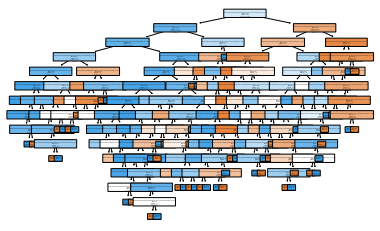

In [45]:
plot_tree(rf.estimators_[1], 
          feature_names= rf, 
          class_names= ['0','1'], 
          filled=True, 
          impurity=True, 
          rounded=True)

print('This is one of my twenty decision trees for random forest')



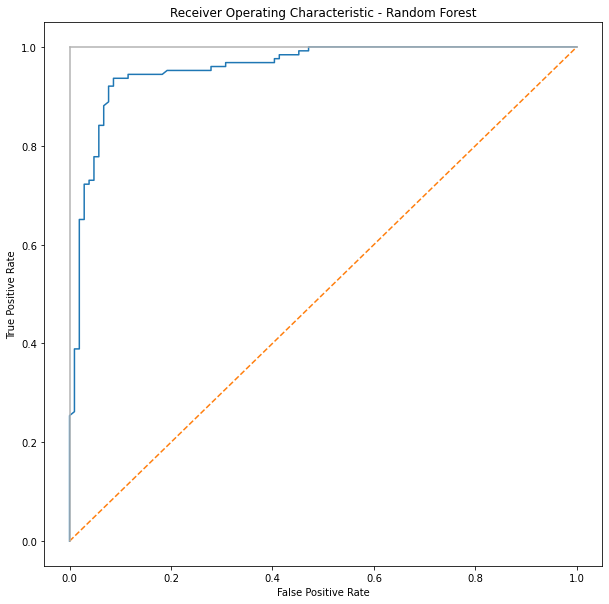

In [46]:
y_score1 = rf.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()